DATA CLEANING

Handling Missing Values & Encoding Categorical Variables in Machine Learning

🔹 Part 1: Handling Missing Values

In [1]:
pip install openpyxl

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load my dataset
df = pd.read_excel('/content/Raw_Cars_Data.xlsx')
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [6]:
df.shape

(303, 13)

In [7]:
df[df.duplicated()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


In [8]:
#Dropping those duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(289, 13)

In [10]:
#Check if duplicates still exist
df.duplicated().sum()

np.int64(0)

In [11]:
#Check missing values acroos the dataset
df.isnull().sum()

,0
INDEX,0
INCOME,43
MARITAL STATUS,28
SEX,6
EDUCATION,44
JOB,46
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [12]:
#Proper Cleaning
#Now let's clean for the postal code & city
df[df['POSTAL CODE'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
16,17,NaN,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.0,Texas,NaN
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN


In [13]:
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
11,12,NaN,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,NaN,42420.0
19,20,40656.44899,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,NaN,42420.0
225,212,81766.51691,No,M,High School,Blue Collar,30.468715,Commercial,15570.0,SUV,7.0,NaN,44123.0
254,241,204667.58970,Yes,F,Masters,NaN,31.515561,Commercial,21970.0,Van,NaN,NaN,11435.0
285,272,0.00000,Yes,F,Bachelors,Student,50.484397,Private,9270.0,SUV,10.0,NaN,44412.0
292,279,69475.68892,Yes,F,High School,Blue Collar,43.727279,Private,12750.0,SUV,6.0,NaN,44412.0


In [14]:
#Let identify all the cities and their postal codes
df.groupby('CITY')['POSTAL CODE'].value_counts()

,,count
CITY,POSTAL CODE,
Columbia,44123.0,28
Houston,61701.0,39
Las Vegas,44412.0,38
Los Angeles,90049.0,19
New Albany,47150.0,17
New York City,12180.0,23
Philadelphia,84057.0,1
San Francisco,55106.0,27
Seattle,78207.0,36


In [15]:
#Manual filling of the three missing postal codes
df.loc[[7,16,299],'POSTAL CODE'] = [42420,42420,44412]
df[df['POSTAL CODE'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [16]:
#Removing the unwanted decimal place in the postal codes column
df['POSTAL CODE'] = df['POSTAL CODE'].astype(int)
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420


In [17]:
df.groupby('CITY')['POSTAL CODE'].value_counts()

,,count
CITY,POSTAL CODE,
Columbia,44123,28
Houston,61701,39
Las Vegas,44412,39
Los Angeles,90049,19
New Albany,47150,17
New York City,12180,23
Philadelphia,84057,1
San Francisco,55106,27
Seattle,78207,36


In [18]:
#a dict of postal codes of city row with missing data to use in filling the missing cities
postal_city_mapping = {
     '44123.': 'Columbia',
    '61701': 'Houston',
    '44412': 'Las Vegas',
    '90049': 'Los Angeles',
    '47150': 'New Albany',
    '12180': 'New York City',
    '84057': 'Philadelphia',
    '55106': 'San Francisco',
    '78207': 'Seattle',
    '11435': 'Washington',
    '42420': 'Texas'
}

#To fill the cities with the postal codes mapping
df.loc[df['CITY'].isnull(), 'CITY'] = df['POSTAL CODE'].map(postal_city_mapping)
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
11,12,NaN,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,NaN,42420
19,20,40656.44899,Yes,F,High School,NaN,57.091375,Private,9170.0,Sports Car,7.0,NaN,42420
225,212,81766.51691,No,M,High School,Blue Collar,30.468715,Commercial,15570.0,SUV,7.0,NaN,44123
254,241,204667.58970,Yes,F,Masters,NaN,31.515561,Commercial,21970.0,Van,NaN,NaN,11435
285,272,0.00000,Yes,F,Bachelors,Student,50.484397,Private,9270.0,SUV,10.0,NaN,44412
292,279,69475.68892,Yes,F,High School,Blue Collar,43.727279,Private,12750.0,SUV,6.0,NaN,44412


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
#a dict of postal codes of city row with missing data to use in filling the missing cities
postal_city_mapping = {
    '44123': 'Columbia',
    '61701': 'Houston',
    '44412': 'Las Vegas',
    '90049': 'Los Angeles',
    '47150': 'New Albany',
    '12180': 'New York City',
    '84057': 'Philadelphia',
    '55106': 'San Francisco',
    '78207': 'Seattle',
    '11435': 'Washington',
    '42420': 'Texas'
}

#To fill the cities with the postal codes mapping
df['CITY'].fillna(df['POSTAL CODE'].astype(str).map(postal_city_mapping), inplace=True)
df[df['CITY'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [21]:
df.isnull().sum()

,0
INDEX,0
INCOME,43
MARITAL STATUS,28
SEX,6
EDUCATION,44
JOB,46
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [22]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420


In [23]:
df[['EDUCATION', 'JOB']].isnull().sum()

,0
EDUCATION,44
JOB,46


In [24]:
df.groupby('EDUCATION')['JOB'].value_counts(dropna=False)

EDUCATION    JOB         
Bachelors    Blue Collar     19
             Professional    16
             Clerical         6
             Manager          5
             NaN              5
             Student          3
High School  Blue Collar     53
             Clerical        34
             Student         23
             NaN             17
             Home Maker      13
             Professional     5
             Manager          2
Masters      NaN             18
             Lawyer          11
             Home Maker       5
             Manager          3
             Professional     1
PhD          Doctor           4
             Home Maker       1
             Manager          1
Name: count, dtype: int64

In [25]:
# Examine the income distribution for each education level across the entire dataset
display(df.groupby('EDUCATION')['INCOME'].describe())

,count,mean,std,min,25%,50%,75%,max
EDUCATION,,,,,,,,
Bachelors,48.0,70213.582160,35305.269817,0.0000,52583.801625,68941.984075,86554.560375,176848.9483
High School,128.0,30313.319266,24391.801340,0.0000,12029.214655,28589.693970,44523.930663,130794.5742
Masters,30.0,80540.261259,47082.532992,0.0000,51954.518948,75157.269880,109653.878625,204667.5897
PhD,5.0,167625.879580,26777.290892,136343.7947,152059.803600,159399.016700,189554.858600,200771.9243


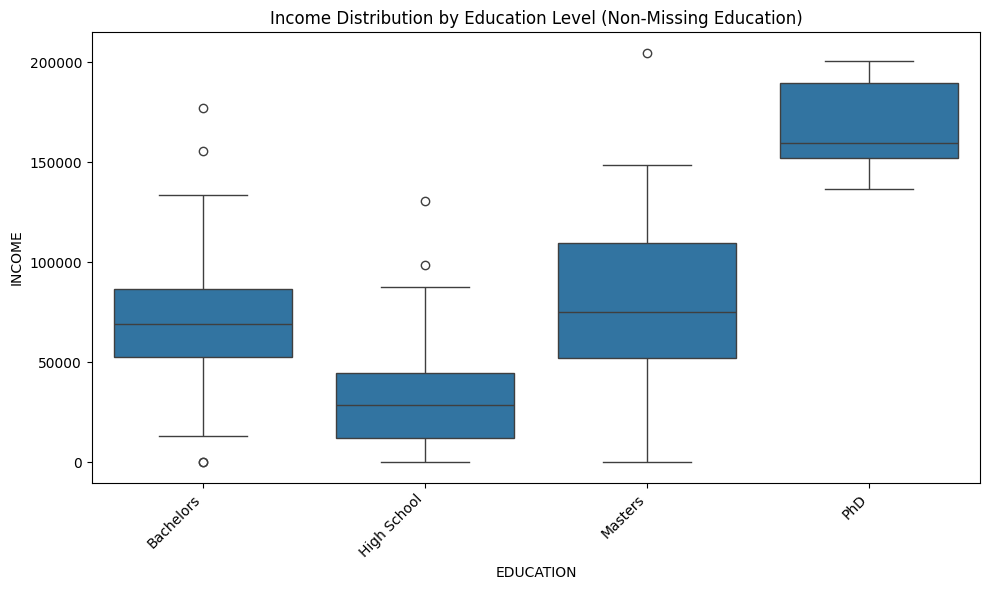

In [26]:
# Visualize the income distribution for each education level where EDUCATION is not missing
plt.figure(figsize=(10, 6))
sns.boxplot(x='EDUCATION', y='INCOME', data=df.dropna(subset=['EDUCATION']))
plt.title('Income Distribution by Education Level (Non-Missing Education)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# Define income ranges based on the box plot for each education level
# These ranges are approximate and can be adjusted based on closer inspection of the data
def impute_education_by_income(row):
    if pd.isnull(row['EDUCATION']):
        income = row['INCOME']
        if pd.isnull(income):
            return None # Cannot impute if income is also missing
        elif income <= 50000: # Approximate range for High School
            return 'High School'
        elif income <= 130000: # Approximate range for Bachelors/Masters overlap
             # Need to be more precise or use another feature if possible for Bachelors/Masters
             # For simplicity, let's check if income is closer to the median of Bachelors or Masters
            bachelors_median = df[df['EDUCATION'] == 'Bachelors']['INCOME'].median()
            masters_median = df[df['EDUCATION'] == 'Masters']['INCOME'].median()
            if abs(income - bachelors_median) <= abs(income - masters_median):
                 return 'Bachelors'
            else:
                 return 'Masters'
        elif income > 130000: # Approximate range for PhD/higher Masters
             # Similar logic as above to differentiate between Masters and PhD if needed
             phd_median = df[df['EDUCATION'] == 'PhD']['INCOME'].median()
             masters_median = df[df['EDUCATION'] == 'Masters']['INCOME'].median()
             if abs(income - phd_median) <= abs(income - masters_median):
                 return 'PhD'
             else:
                 return 'Masters'

        else:
             return None # Should not happen if all ranges are covered
    else:
        return row['EDUCATION'] # Keep existing education if not missing

# Apply the imputation function
df['EDUCATION'] = df.apply(impute_education_by_income, axis=1)

# Check the number of remaining missing values in 'EDUCATION'
df['EDUCATION'].isnull().sum()

np.int64(9)

In [28]:
df.groupby('EDUCATION')['JOB'].value_counts(dropna=False)

EDUCATION    JOB         
Bachelors    Blue Collar     20
             Professional    16
             Clerical         6
             Manager          6
             NaN              6
             Student          3
High School  Blue Collar     56
             Clerical        40
             Student         26
             Home Maker      21
             NaN             19
             Professional     6
             Manager          2
Masters      NaN             18
             Lawyer          15
             Home Maker       5
             Blue Collar      3
             Manager          3
             Professional     1
PhD          Doctor           4
             Manager          2
             Home Maker       1
             NaN              1
Name: count, dtype: int64

**Reasoning**:
Filter the DataFrame for rows with missing 'JOB' and then group by 'EDUCATION' to count the missing jobs per education level.



In [29]:
missing_job_df = df[df['JOB'].isnull()]
missing_job_counts = missing_job_df.groupby('EDUCATION').size()
display(missing_job_counts)

,0
EDUCATION,
Bachelors,6
High School,19
Masters,18
PhD,1


**Reasoning**:
Filter the DataFrame to include only rows where 'JOB' is not missing, then group by 'EDUCATION' and 'JOB' and describe the income distribution for each group.



In [30]:
known_job_df = df.dropna(subset=['JOB'])
income_distribution_by_education_job = known_job_df.groupby(['EDUCATION', 'JOB'])['INCOME'].describe()
display(income_distribution_by_education_job)

count           mean           std            min  \
EDUCATION   JOB                                                               
Bachelors   Blue Collar    18.0   79043.894074  36402.181320   33283.092420   
            Clerical        4.0   38133.728698  23548.102238   12871.119290   
            Manager         6.0   85913.103513  35358.713696   62426.395540   
            Professional   15.0   69636.850513  24447.508301   20147.848030   
            Student         2.0       0.000000      0.000000       0.000000   
High School Blue Collar    47.0   45239.498989  20024.999324    9536.124182   
            Clerical       35.0   27792.767693  11376.049774    2954.141221   
            Home Maker     20.0    7968.239840  10354.392397       0.000000   
            Manager         2.0   62725.659780  34979.713910   37991.266870   
            Professional    5.0   39114.639038  11452.233652   24546.040160   
            Student        24.0    4651.321306   7476.502505       0.000000   
Masters     Blue Collar     3.0   84613.752307  10397.365199   73842.014490   
            Home Maker      5.0   11365.958162  12097.376155       0.000000   
            Lawyer         11.0   81486.457964  30340.091472   46927.747990   
            Manager         2.0   89119.702400  39244.141816   61369.903600   
            Professional    1.0   57062.788590           NaN   57062.788590   
PhD         Doctor          4.0  171517.398575  29241.607505  136343.794700   
            Home Maker      0.0            NaN           NaN            NaN   
            Manager         2.0  144581.268900  10576.245199  137102.734200   

                                    25%            50%            75%  \
EDUCATION   JOB                                                         
Bachelors   Blue Collar    58510.557545   73478.428235   87128.669505   
            Clerical       21262.571000   38342.985670   55214.143368   
            Manager        64481.246820   74801.335820   83949.345190   
            Professional   55315.497365   69793.558320   88841.809510   
            Student            0.000000       0.000000       0.000000   
High School Blue Collar    30465.412120   43173.633220   61395.828140   
            Clerical       20011.883350   28591.851730   33800.939930   
            Home Maker         0.000000    2435.418203   15117.026623   
            Manager        50358.463325   62725.659780   75092.856235   
            Professional   31176.831290   40759.527700   45733.926340   
            Student            0.000000     675.146418    6280.086261   
Masters     Blue Collar    79625.036320   85408.058150   89999.621215   
            Home Maker         0.000000   10231.933570   18774.635870   
            Lawyer         62705.670660   77099.966240   96052.851085   
            Manager        75244.803000   89119.702400  102994.601800   
            Professional   57062.788590   57062.788590   57062.788590   
PhD         Doctor        153635.211200  174476.937650  192359.125025   
            Home Maker              NaN            NaN            NaN   
            Manager       140842.001550  144581.268900  148320.536250   

                                   max  
EDUCATION   JOB                         
Bachelors   Blue Collar   176848.94830  
            Clerical       62977.82416  
            Manager       155409.65510  
            Professional  105276.62180  
            Student            0.00000  
High School Blue Collar    98421.21075  
            Clerical       60049.83017  
            Home Maker     32956.01082  
            Manager        87460.05269  
            Professional   53356.86970  
            Student        32708.12149  
Masters     Blue Collar    94591.18428  
            Home Maker     27823.22137  
            Lawyer        148442.64020  
            Manager       116869.50120  
            Professional   57062.78859  
PhD         Doctor        200771.92430  
            Home Maker             NaN  
            

**Reasoning**:
The previous step successfully analyzed the income distribution for known job types within each education level. The next step is to analyze the income distribution for rows with *missing* 'JOB' values, grouped by 'EDUCATION'. This will allow comparison between the income distributions of known jobs and missing jobs within each education level.



In [31]:
missing_job_df = df[df['JOB'].isnull()]
income_distribution_missing_job = missing_job_df.groupby('EDUCATION')['INCOME'].describe()
display(income_distribution_missing_job)

,count,mean,std,min,25%,50%,75%,max
EDUCATION,,,,,,,,
Bachelors,6.0,70318.488530,24961.696866,24861.5349,66407.771220,73799.680805,87273.830657,93741.01937
High School,18.0,36454.948468,31094.758344,0.0000,16543.763175,33865.662825,50537.440213,130794.57420
Masters,15.0,105595.908969,37699.730739,50251.7624,86637.769710,102903.871700,112466.556950,204667.58970
PhD,1.0,204372.955100,NaN,204372.9551,204372.955100,204372.955100,204372.955100,204372.95510


**Reasoning**:
Define a function to impute missing 'JOB' values based on income distribution within each education level and apply it to the DataFrame.



In [32]:
def impute_job(row):
    if pd.isnull(row['JOB']):
        education = row['EDUCATION']
        income = row['INCOME']

        if pd.isnull(education) or pd.isnull(income):
            return row['JOB']  # Cannot impute if education or income is missing

        # Filter income distributions for known jobs within the current education level
        known_jobs_in_education = income_distribution_by_education_job.loc[education]

        # Calculate difference between current row's income and the median income of each known job
        income_diff = abs(known_jobs_in_education['50%'] - income)

        # Handle cases where there's only one job type or all incomes are the same in the known jobs
        if income_diff.empty:
            return row['JOB']

        # Find the job with the minimum income difference
        closest_job = income_diff.idxmin()

        return closest_job
    else:
        return row['JOB'] # Keep existing job if not missing

# Apply the imputation function
df['JOB'] = df.apply(impute_job, axis=1)

# Check the number of remaining missing values in 'JOB'
df['JOB'].isnull().sum()

np.int64(6)

**Reasoning**:
Verify the imputation by checking the value counts of 'JOB' within each 'EDUCATION' level, specifically focusing on where 'JOB' was previously missing. Then, display the count of remaining missing values in the 'JOB' column to confirm the imputation.



In [33]:
# Check the distribution of imputed jobs within each education level
display(df.groupby('EDUCATION')['JOB'].value_counts(dropna=False))

# Display the number of remaining missing values in the 'JOB' column
display(df['JOB'].isnull().sum())

EDUCATION    JOB         
Bachelors    Blue Collar     21
             Professional    17
             Manager          9
             Clerical         7
             Student          3
High School  Blue Collar     58
             Clerical        45
             Student         28
             Home Maker      23
             Professional     9
             Manager          6
             NaN              1
Masters      Lawyer          17
             Manager         14
             Home Maker       5
             Blue Collar      3
             Professional     3
             NaN              3
PhD          Doctor           5
             Manager          2
             Home Maker       1
Name: count, dtype: int64

np.int64(6)

In [34]:
# Examine the income distribution for each combination of 'JOB' and 'EDUCATION' where EDUCATION is not missing
known_education_df = df.dropna(subset=['EDUCATION'])
display(known_education_df.groupby(['JOB', 'EDUCATION'])['INCOME'].describe())

count           mean           std            min  \
JOB          EDUCATION                                                        
Blue Collar  Bachelors     19.0   78681.973564  35411.718909   33283.092420   
             High School   49.0   45444.394341  19629.372227    9536.124182   
             Masters        3.0   84613.752307  10397.365199   73842.014490   
Clerical     Bachelors      5.0   35479.289938  21239.469506   12871.119290   
             High School   40.0   26967.457668  10956.904949    2954.141221   
Doctor       PhD            5.0  178088.509880  29277.999010  136343.794700   
Home Maker   High School   22.0    8109.322600   9918.645421       0.000000   
             Masters        5.0   11365.958162  12097.376155       0.000000   
             PhD            0.0            NaN           NaN            NaN   
Lawyer       Masters       13.0   80512.736720  27901.385454   46927.747990   
Manager      Bachelors      9.0   86208.079942  28393.916213   62426.395540   
             High School    6.0   72662.248945  32753.574975   37991.266870   
             Masters       13.0  115069.968592  34445.131004   61369.903600   
             PhD            2.0  144581.268900  10576.245199  137102.734200   
Professional Bachelors     16.0   69315.040700  23653.588936   20147.848030   
             High School    8.0   39466.185677   8677.130725   24546.040160   
             Masters        3.0   57672.232153   7743.200265   50251.762400   
Student      Bachelors      2.0       0.000000      0.000000       0.000000   
             High School   26.0    4293.527359   7281.750377       0.000000   

                                    25%            50%            75%  \
JOB          EDUCATION                                                  
Blue Collar  Bachelors     58517.106940   72167.404380   86841.614940   
             High School   31407.301990   44437.968930   60755.192610   
             Masters       79625.036320   85408.058150   89999.621215   
Clerical     Bachelors     24059.721570   24861.534900   52626.249770   
             High School   19204.000873   27249.660565   33049.974705   
Doctor       PhD          159399.016700  189554.858600  200771.924300   
Home Maker   High School       0.000000    3260.646588   14284.694370   
             Masters           0.000000   10231.933570   18774.635870   
             PhD                    NaN            NaN            NaN   
Lawyer       Masters       63889.858050   77099.966240   86551.348470   
Manager      Bachelors     66840.831240   82761.840400   91221.121800   
             High School   55212.158080   63259.014505   81919.566865   
             Masters       94565.863510  109957.302300  116869.501200   
             PhD          140842.001550  144581.268900  148320.536250   
Professional Bachelors     56351.039632   67140.725910   84962.986280   
             High School   37347.980945   40375.629700   42003.127360   
             Masters       53657.275495   57062.788590   61382.467030   
Student      Bachelors         0.000000       0.000000       0.000000   
             High School       0.000000     203.419041    5767.675720   

                                   max  
JOB          EDUCATION                  
Blue Collar  Bachelors    176848.94830  
             High School   98421.21075  
             Masters       94591.18428  
Clerical     Bachelors     62977.82416  
             High School   60049.83017  
Doctor       PhD          204372.95510  
Home Maker   High School   32956.01082  
             Masters       27823.22137  
             PhD                   NaN  
Lawyer       Masters      148442.64020  
Manager      Bachelors    155409.65510  
             High School  130794.57420  
             Masters      204667.58970  
             PhD          152059.80360  
Professional Bachelors    105276.62180  
             High School   53356.86970  
             Masters       65702.14547  
Student      Bachelors         0.00000  
            

In [35]:
df[['EDUCATION', 'JOB']].isnull().sum()

,0
EDUCATION,9
JOB,6


**Reasoning**:
Filter the DataFrame for rows with missing 'EDUCATION', group by 'JOB', and count the missing education values per job type.



In [36]:
missing_education_df = df[df['EDUCATION'].isnull()]
missing_education_counts = missing_education_df.groupby('JOB').size()
display(missing_education_counts)

,0
JOB,
Blue Collar,3
Clerical,2
Manager,1
Student,1


In [37]:
df.isnull().sum()

,0
INDEX,0
INCOME,43
MARITAL STATUS,28
SEX,6
EDUCATION,9
JOB,6
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [38]:
display(df['INCOME'].describe())

,INCOME
count,246.000000
mean,49229.059901
std,42207.456592
min,0.000000
25%,18499.955555
50%,40171.535635
75%,69429.320040
max,204667.589700


In [39]:
# Examine the income distribution for each combination of 'EDUCATION' and 'JOB' where INCOME is not missing
known_income_df = df.dropna(subset=['INCOME'])
display(known_income_df.groupby(['EDUCATION', 'JOB'])['INCOME'].describe())

count           mean           std            min  \
EDUCATION   JOB                                                               
Bachelors   Blue Collar    19.0   78681.973564  35411.718909   33283.092420   
            Clerical        5.0   35479.289938  21239.469506   12871.119290   
            Manager         9.0   86208.079942  28393.916213   62426.395540   
            Professional   16.0   69315.040700  23653.588936   20147.848030   
            Student         2.0       0.000000      0.000000       0.000000   
High School Blue Collar    49.0   45444.394341  19629.372227    9536.124182   
            Clerical       40.0   26967.457668  10956.904949    2954.141221   
            Home Maker     22.0    8109.322600   9918.645421       0.000000   
            Manager         6.0   72662.248945  32753.574975   37991.266870   
            Professional    8.0   39466.185678   8677.130725   24546.040160   
            Student        26.0    4293.527359   7281.750377       0.000000   
Masters     Blue Collar     3.0   84613.752307  10397.365199   73842.014490   
            Home Maker      5.0   11365.958162  12097.376155       0.000000   
            Lawyer         13.0   80512.736720  27901.385454   46927.747990   
            Manager        13.0  115069.968592  34445.131004   61369.903600   
            Professional    3.0   57672.232153   7743.200265   50251.762400   
PhD         Doctor          5.0  178088.509880  29277.999010  136343.794700   
            Manager         2.0  144581.268900  10576.245199  137102.734200   

                                    25%            50%            75%  \
EDUCATION   JOB                                                         
Bachelors   Blue Collar    58517.106940   72167.404380   86841.614940   
            Clerical       24059.721570   24861.534900   52626.249770   
            Manager        66840.831240   82761.840400   91221.121800   
            Professional   56351.039632   67140.725910   84962.986280   
            Student            0.000000       0.000000       0.000000   
High School Blue Collar    31407.301990   44437.968930   60755.192610   
            Clerical       19204.000873   27249.660565   33049.974705   
            Home Maker         0.000000    3260.646588   14284.694370   
            Manager        55212.158080   63259.014505   81919.566865   
            Professional   37347.980945   40375.629700   42003.127360   
            Student            0.000000     203.419041    5767.675720   
Masters     Blue Collar    79625.036320   85408.058150   89999.621215   
            Home Maker         0.000000   10231.933570   18774.635870   
            Lawyer         63889.858050   77099.966240   86551.348470   
            Manager        94565.863510  109957.302300  116869.501200   
            Professional   53657.275495   57062.788590   61382.467030   
PhD         Doctor        159399.016700  189554.858600  200771.924300   
            Manager       140842.001550  144581.268900  148320.536250   

                                   max  
EDUCATION   JOB                         
Bachelors   Blue Collar   176848.94830  
            Clerical       62977.82416  
            Manager       155409.65510  
            Professional  105276.62180  
            Student            0.00000  
High School Blue Collar    98421.21075  
            Clerical       60049.83017  
            Home Maker     32956.01082  
            Manager       130794.57420  
            Professional   53356.86970  
            Student        32708.12149  
Masters     Blue Collar    94591.18428  
            Home Maker     27823.22137  
            Lawyer        148442.64020  
            Manager       204667.58970  
            Professional   65702.14547  
PhD         Doctor        204372.95510  
            Manager       152059.80360

In [40]:
# Impute missing 'INCOME' values with the median income of their respective EDUCATION and JOB groups
df['INCOME'] = df.groupby(['EDUCATION', 'JOB'])['INCOME'].transform(lambda x: x.fillna(x.median()))

# Check the number of remaining missing values in 'INCOME'
df['INCOME'].isnull().sum()

np.int64(14)

In [41]:
# Impute remaining missing 'INCOME' values with the median income of their respective JOB groups
df['INCOME'] = df.groupby('JOB')['INCOME'].transform(lambda x: x.fillna(x.median()))

# Check the number of remaining missing values in 'INCOME'
df['INCOME'].isnull().sum()

np.int64(6)

In [42]:
df[df['INCOME'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
45,46,NaN,Yes,F,None,NaN,NaN,Private,1500.0,SUV,10.0,New Albany,47150
63,64,NaN,NaN,M,Masters,NaN,51.045426,Commercial,23250.0,Panel Truck,18.0,New York City,12180
87,74,NaN,No,F,None,NaN,15.624817,Private,22920.0,Sports Car,10.0,New York City,12180
113,100,NaN,No,F,Masters,NaN,42.376470,Commercial,24410.0,Pickup,18.0,San Francisco,55106
121,108,NaN,No,M,Masters,NaN,28.174277,NaN,19530.0,Van,17.0,San Francisco,55106
301,288,NaN,Yes,F,High School,NaN,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412


In [43]:
# Filter for rows where INCOME is missing but JOB is not missing
missing_income_but_job_present = df[df['INCOME'].isnull() & df['JOB'].notnull()]

# Display the job types present in these rows
display(missing_income_but_job_present['JOB'].value_counts())

,count
JOB,


In [44]:
# Impute missing 'INCOME' values for rows where INCOME is missing but JOB is not missing
# Use the median income for each job type from the entire dataset (where income is not missing)
df['INCOME'] = df.apply(lambda row: df.groupby('JOB')['INCOME'].median()[row['JOB']] if pd.isnull(row['INCOME']) and pd.notnull(row['JOB']) else row['INCOME'], axis=1)

# Check the number of remaining missing values in 'INCOME'
df['INCOME'].isnull().sum()

np.int64(6)

In [45]:
# Calculate the overall mode for 'JOB'
job_mode = df['JOB'].mode()[0]

# Impute the remaining missing values in 'JOB' with the overall mode
df['JOB'].fillna(job_mode, inplace=True)

# Check the number of remaining missing values in 'JOB'
df['JOB'].isnull().sum()

np.int64(0)

In [46]:
df[df['INCOME'].isnull()]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
45,46,NaN,Yes,F,None,Blue Collar,NaN,Private,1500.0,SUV,10.0,New Albany,47150
63,64,NaN,NaN,M,Masters,Blue Collar,51.045426,Commercial,23250.0,Panel Truck,18.0,New York City,12180
87,74,NaN,No,F,None,Blue Collar,15.624817,Private,22920.0,Sports Car,10.0,New York City,12180
113,100,NaN,No,F,Masters,Blue Collar,42.376470,Commercial,24410.0,Pickup,18.0,San Francisco,55106
121,108,NaN,No,M,Masters,Blue Collar,28.174277,NaN,19530.0,Van,17.0,San Francisco,55106
301,288,NaN,Yes,F,High School,Blue Collar,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412


In [47]:
# Calculate the median income for the 'Blue Collar' job category from non-missing data
blue_collar_median_income = df[df['JOB'] == 'Blue Collar']['INCOME'].median()

# Impute the remaining missing 'INCOME' values with the 'Blue Collar' median income
df['INCOME'].fillna(blue_collar_median_income, inplace=True)

# Check the number of remaining missing values in 'INCOME'
df['INCOME'].isnull().sum()

np.int64(0)

In [48]:
# Calculate the overall mode for 'EDUCATION'
edu_mode = df['EDUCATION'].mode()[0]

# Impute the remaining missing values in 'EDUCATION' with the overall mode
df['EDUCATION'].fillna(edu_mode, inplace=True)

# Check the number of remaining missing values in 'EDUCATION'
df['EDUCATION'].isnull().sum()

np.int64(0)

In [49]:
df.isnull().sum()

,0
INDEX,0
INCOME,0
MARITAL STATUS,28
SEX,6
EDUCATION,0
JOB,0
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [50]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420
1,2,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420
3,4,77099.96624,No,F,Masters,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420
4,5,130794.57420,No,M,High School,Manager,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420


In [51]:
# Examine the distribution of 'MARITAL STATUS' across combinations of 'EDUCATION' and 'JOB' where MARITAL STATUS is not missing
known_marital_status_df = df.dropna(subset=['MARITAL STATUS'])
display(known_marital_status_df.groupby(['EDUCATION', 'JOB'])['MARITAL STATUS'].value_counts())

EDUCATION    JOB           MARITAL STATUS
Bachelors    Blue Collar   No                11
                           Yes                9
             Clerical      No                 3
                           Yes                2
             Manager       Yes                6
                           No                 2
             Professional  No                13
                           Yes                3
             Student       Yes                2
                           No                 1
High School  Blue Collar   No                30
                           Yes               30
             Clerical      No                28
                           Yes               14
             Home Maker    Yes               12
                           No                 9
             Manager       No                 5
                           Yes                2
             Professional  Yes                5
                           No                 4
             Student       No                15
                           Yes               11
Masters      Blue Collar   No                 3
                           Yes                1
             Home Maker    No                 4
                           Yes                1
             Lawyer        No                 8
                           Yes                6
             Manager       No                 9
                           Yes                4
             Professional  No                 2
PhD          Doctor        No                 3
                           Yes                1
             Home Maker    No                 1
             Manager       Yes                1
Name: count, dtype: int64

In [52]:
# Impute missing 'MARITAL STATUS' with the mode of 'MARITAL STATUS' for each EDUCATION and JOB group
df['MARITAL STATUS'] = df.groupby(['EDUCATION', 'JOB'])['MARITAL STATUS'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

# Check the number of remaining missing values in 'MARITAL STATUS'
df['MARITAL STATUS'].isnull().sum()

np.int64(0)

In [53]:
# Calculate the overall mode for 'SEX'
sex_mode = df['SEX'].mode()[0]

# Impute the remaining missing values in 'SEX' with the overall mode
df['SEX'].fillna(sex_mode, inplace=True)

# Check the number of remaining missing values in 'SEX'
df['SEX'].isnull().sum()

np.int64(0)

In [54]:
df.isnull().sum()

,0
INDEX,0
INCOME,0
MARITAL STATUS,0
SEX,0
EDUCATION,0
JOB,0
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [55]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420
1,2,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420
3,4,77099.96624,No,F,Masters,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420
4,5,130794.57420,No,M,High School,Manager,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420


In [56]:
# Examine the distribution of 'TRAVEL TIME' for each category of 'USE' where both are not missing
known_travel_use_df = df.dropna(subset=['TRAVEL TIME', 'USE'])
display(known_travel_use_df.groupby('USE')['TRAVEL TIME'].describe())

,count,mean,std,min,25%,50%,75%,max
USE,,,,,,,,
Commercial,90.0,33.845411,15.630225,5.0,21.906946,34.187562,44.178529,83.617643
Private,111.0,34.297522,14.270159,5.0,24.126832,35.020971,43.712570,68.018647


In [57]:
# Examine the distribution of 'TRAVEL TIME' across combinations of 'USE' and 'JOB' where all are not missing
known_travel_use_job_df = df.dropna(subset=['TRAVEL TIME', 'USE', 'JOB'])
display(known_travel_use_job_df.groupby(['USE', 'JOB'])['TRAVEL TIME'].describe())

count       mean        std        min        25%  \
USE        JOB                                                               
Commercial Blue Collar    50.0  33.183846  15.189037   5.000000  21.925891   
           Clerical        6.0  28.994855  11.463214  14.459323  20.197055   
           Lawyer          2.0  35.653296   6.855691  30.805591  33.229443   
           Manager        10.0  36.164972  10.765573  21.159540  29.499510   
           Professional   12.0  36.244569  22.872981   5.000000  18.496541   
           Student        10.0  34.503446  17.125719  11.657483  23.345506   
Private    Blue Collar    14.0  34.535786  14.476287   9.926270  22.869954   
           Clerical       34.0  34.306313  12.711167   9.269536  24.801686   
           Doctor          2.0  38.433182   9.653230  31.607317  35.020249   
           Home Maker     19.0  35.142439  14.737736  10.700788  25.583305   
           Lawyer         10.0  36.233053  17.912272   8.760570  19.124797   
           Manager        11.0  27.542480  13.562984   5.000000  16.252725   
           Professional   11.0  45.007808   8.211824  30.044447  40.487983   
           Student        10.0  25.215294  15.863604   5.000000  12.410543   

                               50%        75%        max  
USE        JOB                                            
Commercial Blue Collar   34.085726  43.646628  63.269032  
           Clerical      30.011179  36.253466  44.227539  
           Lawyer        35.653296  38.077149  40.501002  
           Manager       36.448622  45.287102  51.694915  
           Professional  35.876929  44.890439  83.617643  
           Student       31.667640  47.840712  61.040092  
Private    Blue Collar   37.196429  43.370139  60.884292  
           Clerical      36.625537  42.548743  56.539158  
           Doctor        38.433182  41.846114  45.259046  
           Home Maker    32.886869  41.987464  68.018647  
           Lawyer        41.321590  50.947997  55.319377  
           Manager       30.323492  35.331905  50.690831  
           Professional  45.785094  50.546551  57.091375  
           Student       25.852592  31.936437  50.484397

In [58]:
# Examine the distribution of 'USE' across combinations of 'JOB' where USE and JOB are not missing
known_use_job_df = df.dropna(subset=['USE', 'JOB'])
display(known_use_job_df.groupby('JOB')['USE'].value_counts())

JOB           USE       
Blue Collar   Commercial    57
              Private       17
Clerical      Private       41
              Commercial     7
Doctor        Private        3
              Commercial     1
Home Maker    Private       24
              Commercial     1
Lawyer        Private       12
              Commercial     2
Manager       Commercial    13
              Private       13
Professional  Commercial    12
              Private       12
Student       Private       11
              Commercial    10
Name: count, dtype: int64

In [59]:
# Impute missing 'USE' values with the mode of 'USE' for each JOB group
df['USE'] = df.groupby('JOB')['USE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

# Check the number of remaining missing values in 'USE'
df['USE'].isnull().sum()

np.int64(0)

In [60]:
# Impute remaining missing 'TRAVEL TIME' values with the median travel time of their respective USE and JOB groups
# We use the median of the original TRAVEL TIME values within the current groups
df['TRAVEL TIME'] = df.groupby(['USE', 'JOB'])['TRAVEL TIME'].transform(lambda x: x.fillna(x[df['TRAVEL TIME'].notna()].median()))

# Check the number of remaining missing values in 'TRAVEL TIME'
df['TRAVEL TIME'].isnull().sum()

np.int64(2)

In [61]:
# Calculate the overall median for 'TRAVEL TIME' from the original data
overall_travel_time_median = df['TRAVEL TIME'].median()

# Impute the remaining missing values in 'TRAVEL TIME' with the overall median
df['TRAVEL TIME'].fillna(overall_travel_time_median, inplace=True)

# Check the number of remaining missing values in 'TRAVEL TIME'
df['TRAVEL TIME'].isnull().sum()

np.int64(0)

In [62]:
# Examine the distribution of 'MILES CLOCKED' for each category of 'CAR TYPE' where both are not missing
known_miles_type_df = df.dropna(subset=['MILES CLOCKED', 'CAR TYPE'])
display(known_miles_type_df.groupby('CAR TYPE')['MILES CLOCKED'].describe())

,count,mean,std,min,25%,50%,75%,max
CAR TYPE,,,,,,,,
Minivan,36.0,13530.555556,5520.252036,1500.0,11335.0,14370.0,17262.5,23280.0
Panel Truck,17.0,26687.647059,3516.000088,22620.0,23810.0,25910.0,28340.0,34310.0
Pickup,44.0,11050.454545,5455.826395,5100.0,7580.0,9850.0,11677.5,26280.0
SUV,86.0,11932.674419,5860.495146,1500.0,7670.0,11695.0,15757.5,30260.0
Sports Car,50.0,11995.600000,6984.503594,1500.0,6802.5,9265.0,16937.5,31960.0
Van,25.0,20958.400000,4737.763783,16640.0,18150.0,20110.0,21480.0,38000.0


In [63]:
# Impute missing 'MILES CLOCKED' values with the median mileage of their respective CAR TYPE groups
df['MILES CLOCKED'] = df.groupby('CAR TYPE')['MILES CLOCKED'].transform(lambda x: x.fillna(x.median()))

# Check the number of remaining missing values in 'MILES CLOCKED'
df['MILES CLOCKED'].isnull().sum()

np.int64(10)

In [64]:
# Examine the distribution of 'CAR AGE' for each category of 'CAR TYPE' where both are not missing
known_age_type_df = df.dropna(subset=['CAR AGE', 'CAR TYPE'])
display(known_age_type_df.groupby('CAR TYPE')['CAR AGE'].describe())

,count,mean,std,min,25%,50%,75%,max
CAR TYPE,,,,,,,,
Minivan,37.0,6.324324,5.239031,1.0,1.0,5.0,10.00,20.0
Panel Truck,22.0,8.954545,5.593170,1.0,6.5,9.5,11.75,20.0
Pickup,44.0,5.045455,5.002114,1.0,1.0,4.0,8.00,20.0
SUV,84.0,5.571429,4.618678,1.0,1.0,5.5,9.00,20.0
Sports Car,49.0,6.857143,5.627314,1.0,1.0,7.0,10.00,20.0
Van,25.0,7.520000,5.276678,1.0,1.0,8.0,11.00,17.0


In [65]:
# Impute missing 'CAR AGE' values with the median age of their respective CAR TYPE groups
df['CAR AGE'] = df.groupby('CAR TYPE')['CAR AGE'].transform(lambda x: x.fillna(x.median()))

# Check the number of remaining missing values in 'CAR AGE'
df['CAR AGE'].isnull().sum()

np.int64(10)

In [66]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420
1,2,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,11695.0,SUV,1.0,Texas,42420
3,4,77099.96624,No,F,Masters,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas,42420
4,5,130794.57420,No,M,High School,Manager,40.117953,Commercial,28340.0,Panel Truck,10.0,Texas,42420


In [67]:
# Calculate the overall mode for 'CAR TYPE'
car_type_mode = df['CAR TYPE'].mode()[0]

# Impute the remaining missing values in 'CAR TYPE' with the overall mode
df['CAR TYPE'].fillna(car_type_mode, inplace=True)

# Check the number of remaining missing values in 'CAR TYPE'
df['CAR TYPE'].isnull().sum()

np.int64(0)

In [68]:
# Calculate the overall median for 'CAR AGE' and 'MILES CLOCKED'
overall_car_age_median = df['CAR AGE'].median()
overall_miles_clocked_median = df['MILES CLOCKED'].median()

# Impute the remaining missing values with the overall median
df['CAR AGE'].fillna(overall_car_age_median, inplace=True)
df['MILES CLOCKED'].fillna(overall_miles_clocked_median, inplace=True)

# Check the number of remaining missing values in both columns
df[['CAR AGE', 'MILES CLOCKED']].isnull().sum()

,0
CAR AGE,0
MILES CLOCKED,0


In [69]:
df.isnull().sum()

,0
INDEX,0
INCOME,0
MARITAL STATUS,0
SEX,0
EDUCATION,0
JOB,0
TRAVEL TIME,0
USE,0
MILES CLOCKED,0
CAR TYPE,0


# Task
Visualize relationships within the dataset to reveal meaningful patterns, like how things affect each other and trends too.

## Analyze the data

### Subtask:
Examine the summary of the encoded DataFrame, including the number of rows and columns, and the data types of each column.


**Reasoning**:
Display the shape and information of the DataFrame to examine the summary of the encoded data.



In [70]:
display(df.shape)
df.info()

(289, 13)

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           289 non-null    int64  
 1   INCOME          289 non-null    float64
 2   MARITAL STATUS  289 non-null    object 
 3   SEX             289 non-null    object 
 4   EDUCATION       289 non-null    object 
 5   JOB             289 non-null    object 
 6   TRAVEL TIME     289 non-null    float64
 7   USE             289 non-null    object 
 8   MILES CLOCKED   289 non-null    float64
 9   CAR TYPE        289 non-null    object 
 10  CAR AGE         289 non-null    float64
 11  CITY            289 non-null    object 
 12  POSTAL CODE     289 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 39.7+ KB


## Visualize numerical feature distributions

### Subtask:
Create histograms or density plots for numerical columns to understand their distributions.

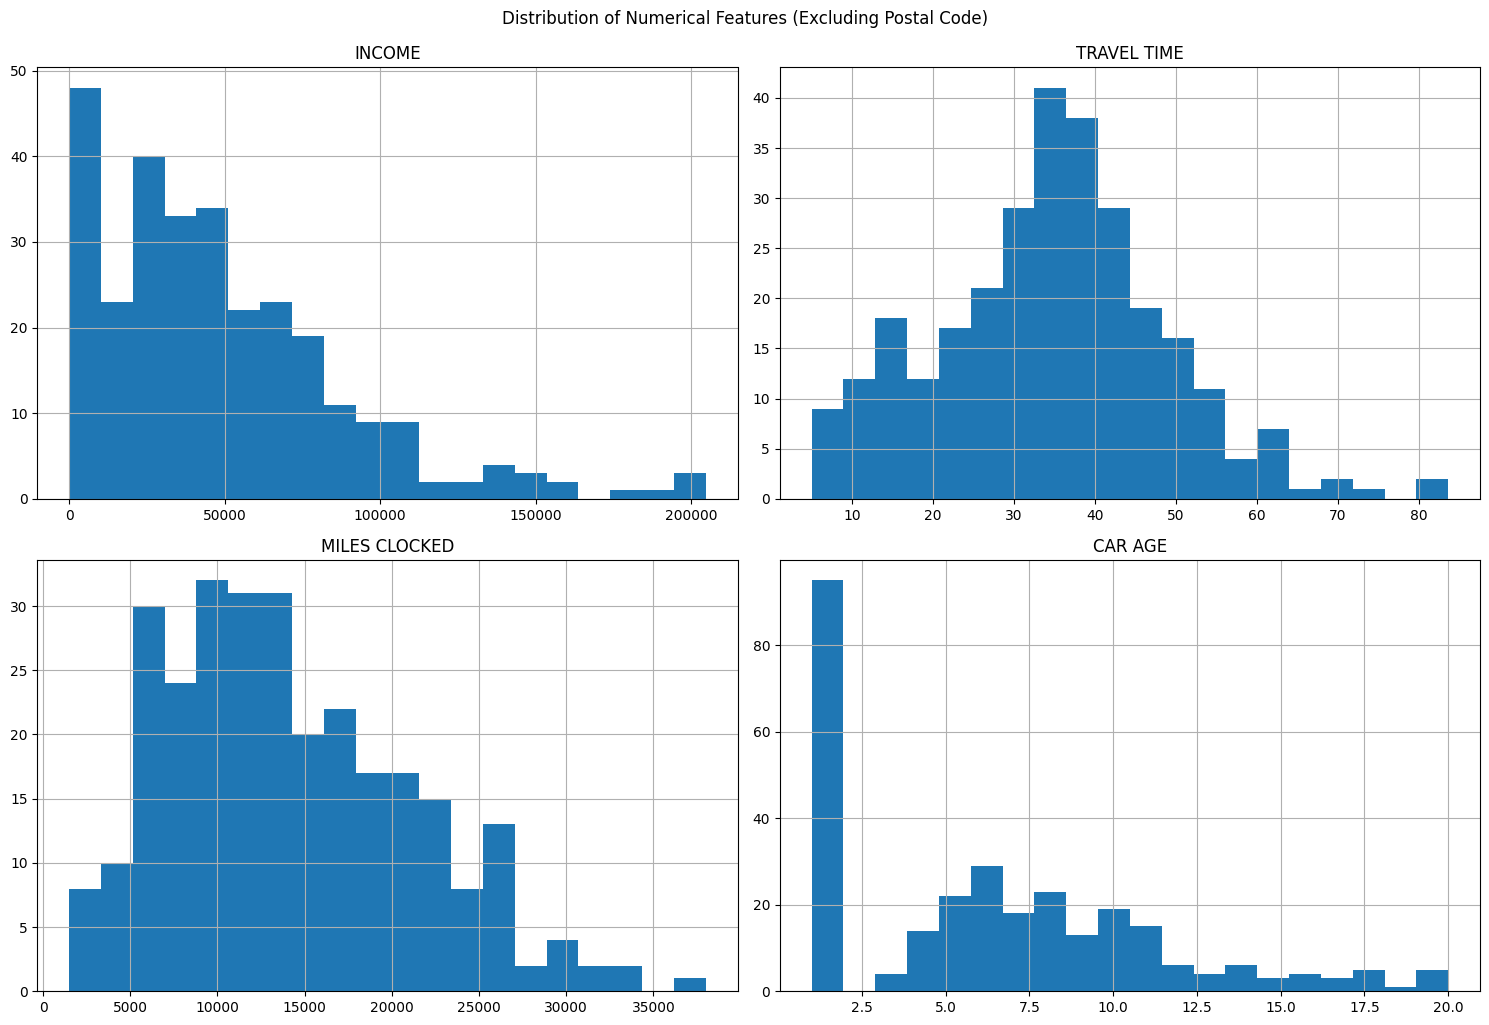

In [72]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the INDEX and POSTAL CODE columns as they are not ideal for this visualization
numerical_cols.remove('INDEX')
numerical_cols.remove('POSTAL CODE')

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features (Excluding Postal Code)', y=1.02)
plt.show()

## Visualize relationships between numerical features

### Subtask:
Generate scatter plots or pair plots to visualize relationships between pairs of numerical variables.

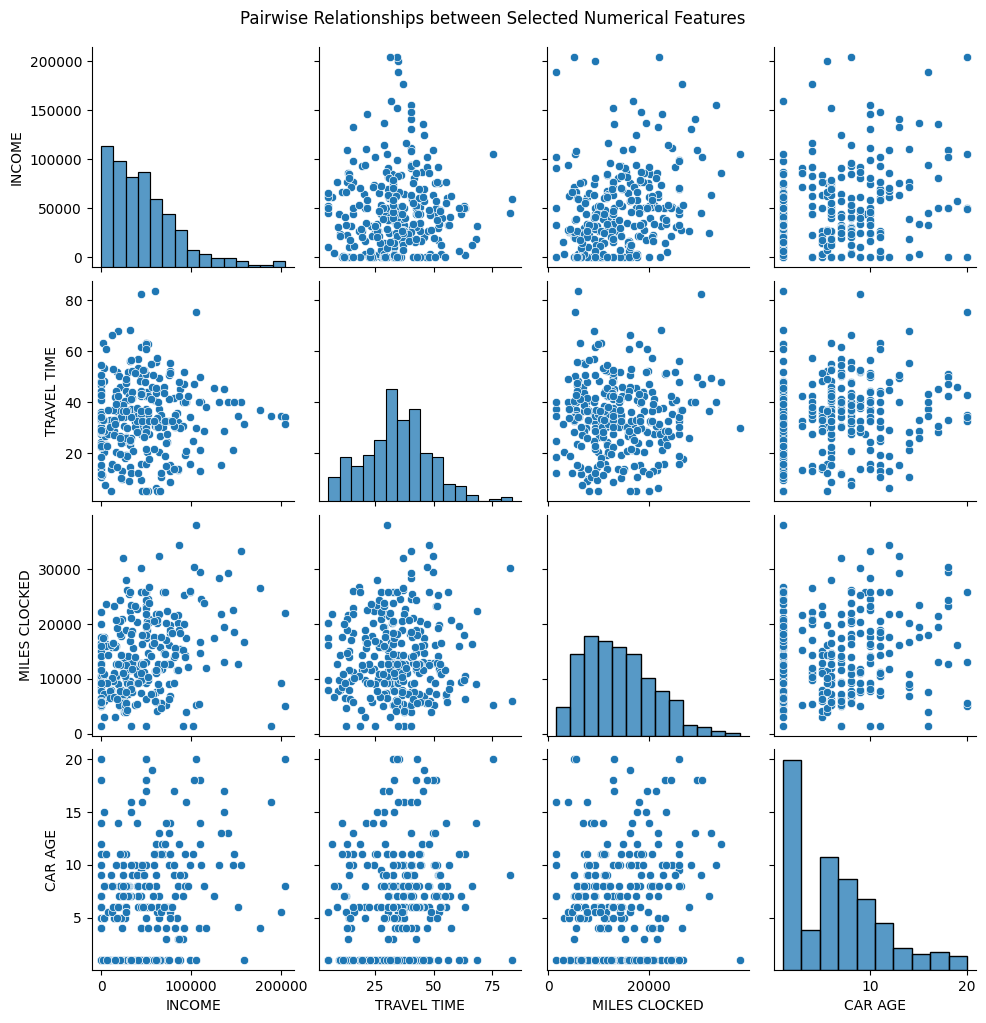

In [73]:
# Select a subset of numerical columns for pair plot to avoid overcrowding
# Exclude the INDEX and POSTAL CODE columns
numerical_cols_subset = ['INCOME', 'TRAVEL TIME', 'MILES CLOCKED', 'CAR AGE']

# Create pair plots for the selected numerical columns
sns.pairplot(df[numerical_cols_subset])
plt.suptitle('Pairwise Relationships between Selected Numerical Features', y=1.02)
plt.show()

## Visualize relationships between numerical and categorical features

### Subtask:
Create box plots, violin plots, or grouped bar charts to compare the distribution of numerical features across different categories.

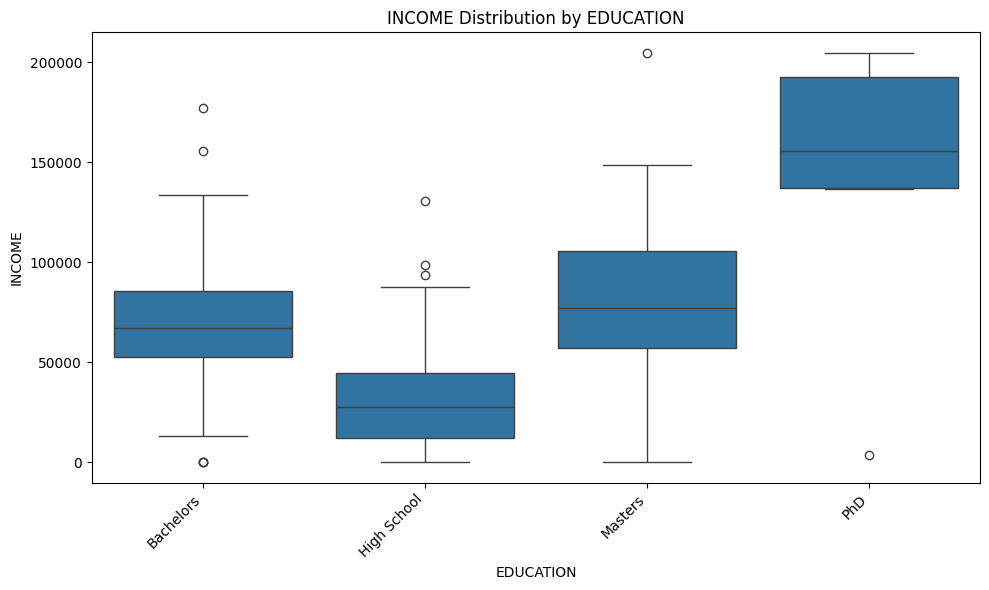

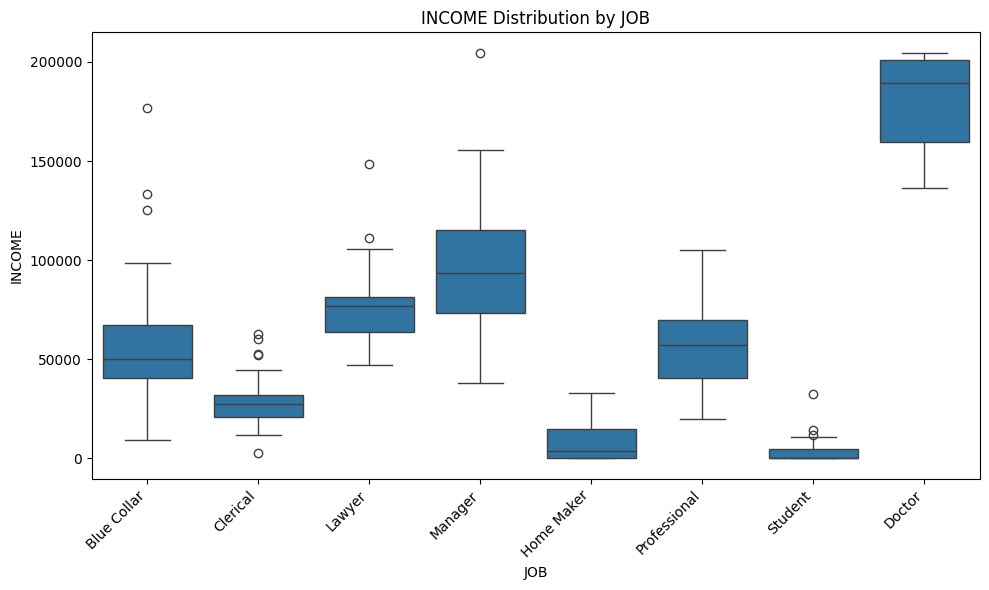

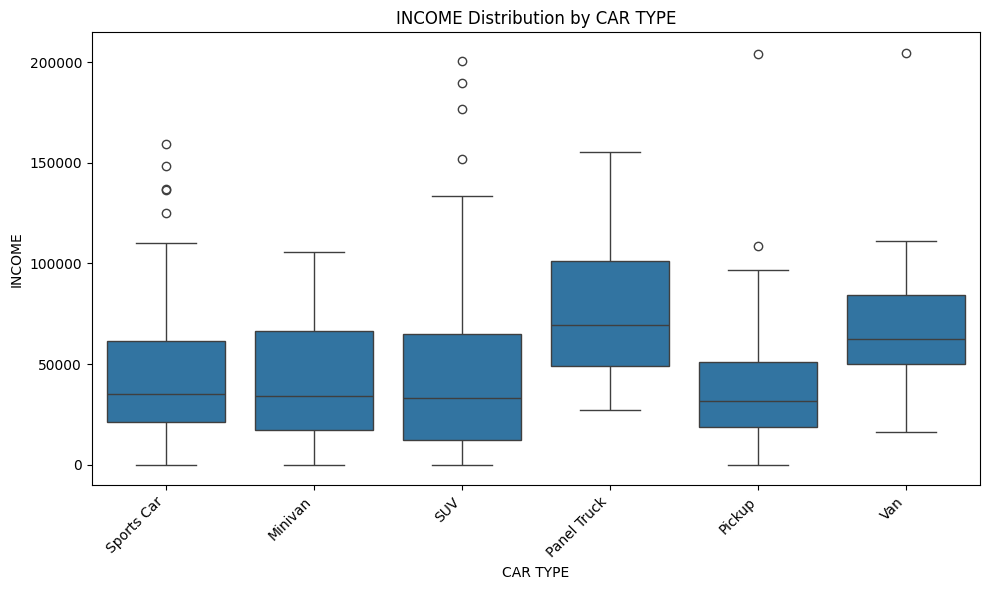

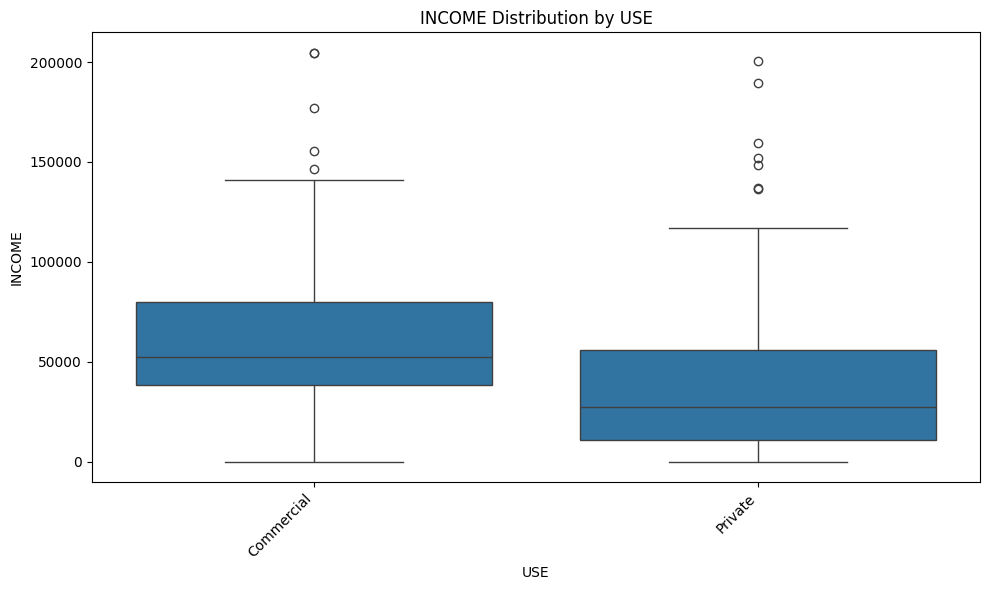

In [75]:
# Select a few numerical and categorical columns for visualization from the cleaned data
numerical_col = 'INCOME'
categorical_cols_to_visualize = ['EDUCATION', 'JOB', 'CAR TYPE', 'USE']

for col in categorical_cols_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y=numerical_col, data=df)
    plt.title(f'{numerical_col} Distribution by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Visualize correlations

### Subtask:
Calculate and visualize the correlation matrix for numerical features using a heatmap to identify strong linear relationships.

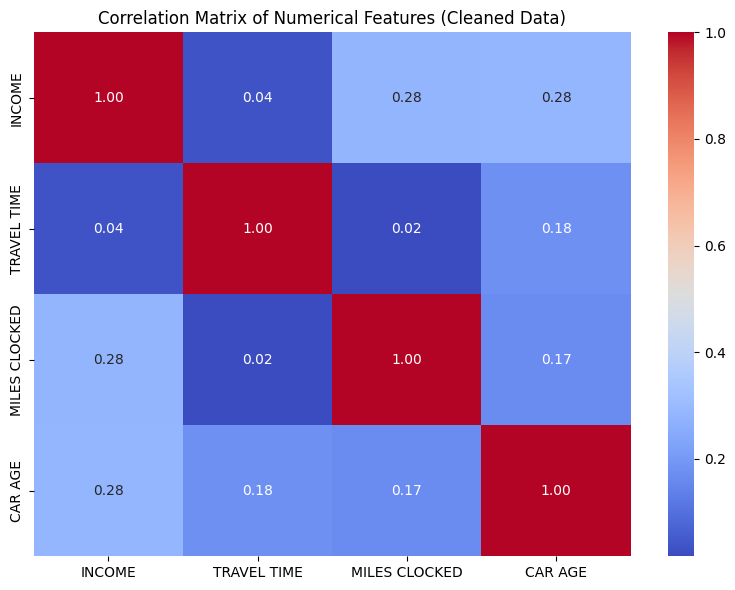

In [76]:
# Select numerical columns from the cleaned data (before encoding)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the INDEX and POSTAL CODE columns as they are not relevant for correlation analysis
numerical_cols.remove('INDEX')
numerical_cols.remove('POSTAL CODE')


# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Cleaned Data)')
plt.tight_layout()
plt.show()

## Visualize relationships between categorical features

### Subtask:
Use count plots, stacked bar charts, or mosaic plots to explore relationships between categorical variables.

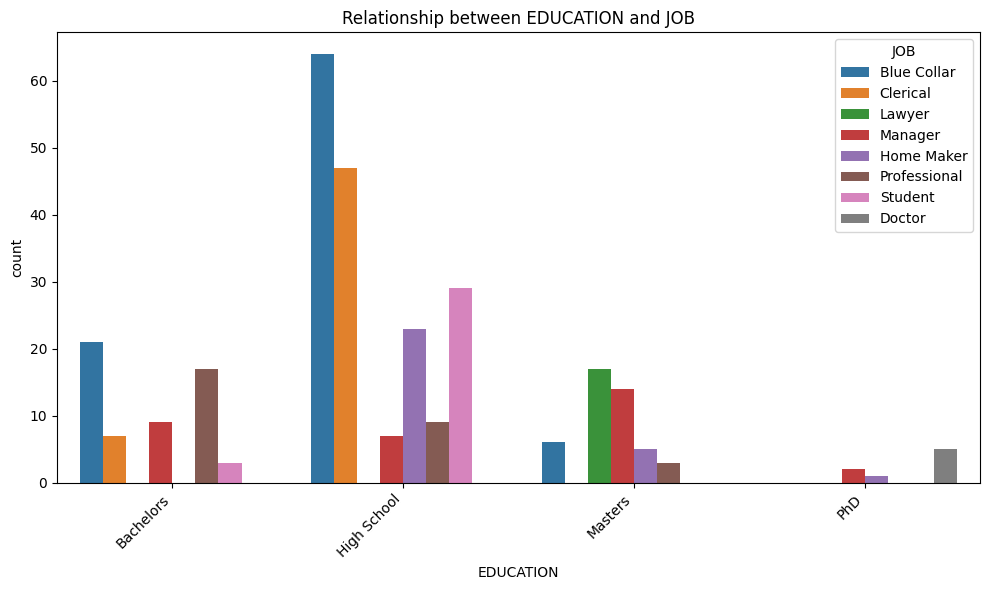

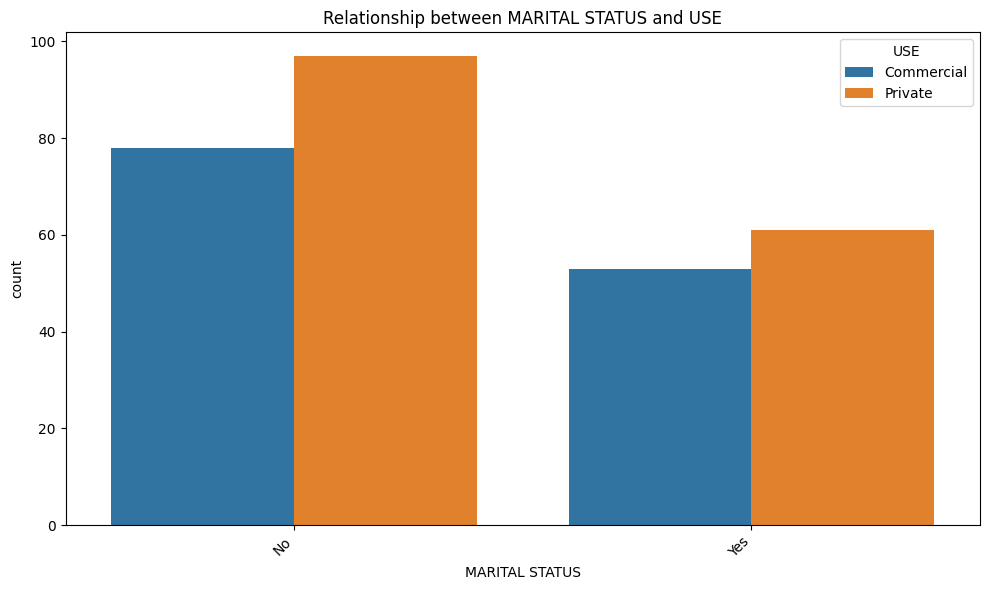

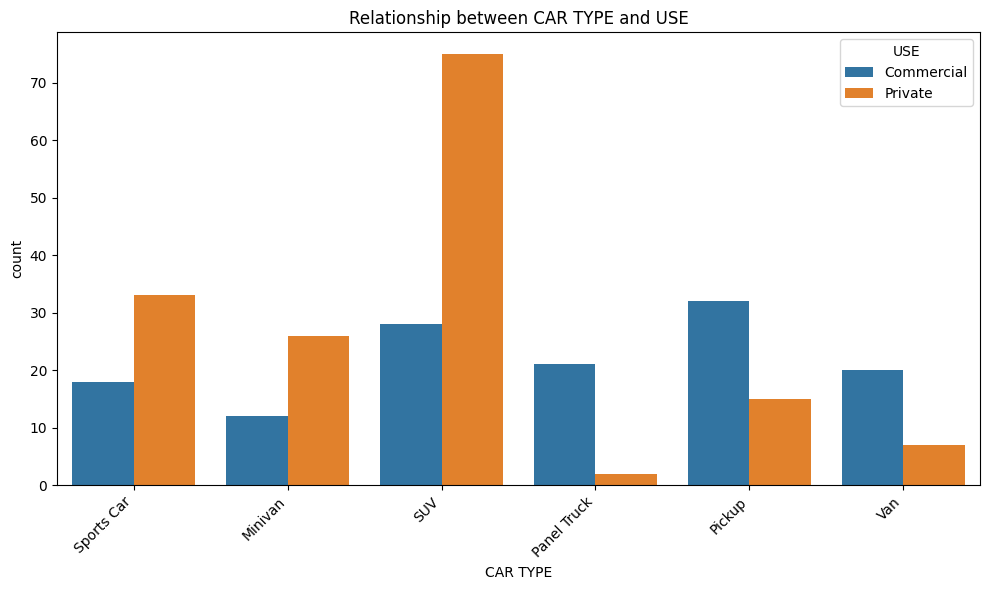

In [74]:
# Select categorical columns from the cleaned data (before encoding)
categorical_cols = ['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY']

# Visualize relationships between pairs of categorical variables using count plots
# We'll select a few pairs to avoid overcrowding
selected_categorical_pairs = [
    ('EDUCATION', 'JOB'),
    ('MARITAL STATUS', 'USE'),
    ('CAR TYPE', 'USE')
]

for col1, col2 in selected_categorical_pairs:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col1, hue=col2, data=df)
    plt.title(f'Relationship between {col1} and {col2}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Summarize findings

### Subtask:
Summarize the key relationships and trends observed from the visualizations.

**Key Findings from Visualizations:**

*   **Numerical Feature Distributions:** [Summarize the distributions of INCOME, TRAVEL TIME, MILES CLOCKED, and CAR AGE based on the histograms.]
*   **Relationships between Numerical Features:** [Summarize the relationships observed in the scatter plots/pair plots, e.g., any apparent correlations or clusters between INCOME, TRAVEL TIME, MILES CLOCKED, and CAR AGE.]
*   **Relationships between Categorical Features:** [Summarize the relationships observed in the count plots of selected categorical pairs, e.g., how job distribution varies with education, or car type with usage.]
*   **Relationships between Numerical and Categorical Features:** [Summarize the relationships observed in the box plots, e.g., how INCOME distribution differs across education levels, job types, car types, or usage.]
*   **Correlations:** [Summarize the key positive and negative correlations observed in the heatmap, focusing on significant relationships between the original numerical features and potentially interesting relationships with the one-hot encoded categorical features.]

# Encoding Task

🔹 Part 3: Encoding Categorical Variables in Machine Learning

Encode categorical variables in the dataframe `df` using appropriate encoding methods.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           289 non-null    int64  
 1   INCOME          289 non-null    float64
 2   MARITAL STATUS  289 non-null    object 
 3   SEX             289 non-null    object 
 4   EDUCATION       289 non-null    object 
 5   JOB             289 non-null    object 
 6   TRAVEL TIME     289 non-null    float64
 7   USE             289 non-null    object 
 8   MILES CLOCKED   289 non-null    float64
 9   CAR TYPE        289 non-null    object 
 10  CAR AGE         289 non-null    float64
 11  CITY            289 non-null    object 
 12  POSTAL CODE     289 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 39.7+ KB


## Identify categorical columns

### Subtask:
Identify the columns in the DataFrame that contain categorical data.


**Reasoning**:
The first step is to inspect the data types of all columns to identify potential categorical columns.



**Reasoning**:
Based on the .info() output, the columns with 'object' dtype are likely categorical. Also, 'POSTAL CODE' although an integer, represents a categorical feature (city-specific). I will list the names of these columns.



In [78]:
categorical_cols = ['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY', 'POSTAL CODE']
print("Categorical columns in the DataFrame:")
print(categorical_cols)

Categorical columns in the DataFrame:
['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY', 'POSTAL CODE']


## Choose encoding methods

### Subtask:
Select appropriate encoding methods for each categorical column (e.g., one-hot encoding, label encoding).


**Reasoning**:
I will analyze each categorical column to determine if it is nominal or ordinal and select an appropriate encoding method based on the number of unique values and the nature of the data.



In [79]:
# Analyze unique values and determine encoding for each categorical column
categorical_cols = ['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY', 'POSTAL CODE']

encoding_methods = {}

for col in categorical_cols:
    unique_values = df[col].unique()
    num_unique = len(unique_values)

    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")

    # Determine encoding method
    if col in ['MARITAL STATUS', 'SEX', 'USE']:
        # Binary or low cardinality nominal features
        encoding_methods[col] = 'One-Hot Encoding'
        print("Chosen Encoding: One-Hot Encoding (Binary/Low Cardinality Nominal)")
    elif col in ['EDUCATION', 'JOB', 'CAR TYPE', 'CITY']:
        # Nominal features with potentially higher cardinality
        encoding_methods[col] = 'One-Hot Encoding' # Starting with One-Hot, consider others if dimensionality becomes an issue
        print("Chosen Encoding: One-Hot Encoding (Nominal)")
    elif col == 'POSTAL CODE':
         # High cardinality nominal feature, but represents geographical areas.
         # One-Hot encoding is a reasonable starting point, but could consider other methods for high cardinality.
         encoding_methods[col] = 'One-Hot Encoding'
         print("Chosen Encoding: One-Hot Encoding (High Cardinality Nominal - Geographical)")

    print("-" * 30)

print("\nSummary of Chosen Encoding Methods:")
for col, method in encoding_methods.items():
    print(f"{col}: {method}")

Column: MARITAL STATUS
Number of unique values: 2
Unique values: ['No' 'Yes']
Chosen Encoding: One-Hot Encoding (Binary/Low Cardinality Nominal)
------------------------------
Column: SEX
Number of unique values: 2
Unique values: ['F' 'M']
Chosen Encoding: One-Hot Encoding (Binary/Low Cardinality Nominal)
------------------------------
Column: EDUCATION
Number of unique values: 4
Unique values: ['Bachelors' 'High School' 'Masters' 'PhD']
Chosen Encoding: One-Hot Encoding (Nominal)
------------------------------
Column: JOB
Number of unique values: 8
Unique values: ['Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker' 'Professional'
 'Student' 'Doctor']
Chosen Encoding: One-Hot Encoding (Nominal)
------------------------------
Column: USE
Number of unique values: 2
Unique values: ['Commercial' 'Private']
Chosen Encoding: One-Hot Encoding (Binary/Low Cardinality Nominal)
------------------------------
Column: CAR TYPE
Number of unique values: 6
Unique values: ['Sports Car' 'Minivan' 

**Reasoning**:
Iterate through the encoding_methods dictionary and apply one-hot encoding to the specified columns.



In [80]:
for col, method in encoding_methods.items():
    if method == 'One-Hot Encoding':
        df = pd.get_dummies(df, columns=[col], prefix=col, dtype=int)
    # Add other encoding methods here if needed in the future
    # elif method == 'Label Encoding':
    #     from sklearn.preprocessing import LabelEncoder
    #     le = LabelEncoder()
    #     df[col] = le.fit_transform(df[col])

df.head()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,MARITAL STATUS_No,MARITAL STATUS_Yes,SEX_F,SEX_M,EDUCATION_Bachelors,...,POSTAL CODE_12180,POSTAL CODE_42420,POSTAL CODE_44123,POSTAL CODE_44412,POSTAL CODE_47150,POSTAL CODE_55106,POSTAL CODE_61701,POSTAL CODE_78207,POSTAL CODE_84057,POSTAL CODE_90049
0,1,125301.24250,45.703013,17430.0,7.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2,50815.44531,20.591628,18930.0,1.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,62977.82416,33.639949,11695.0,1.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,77099.96624,15.415676,18300.0,11.0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,130794.57420,40.117953,28340.0,10.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Review encoded data

### Subtask:
Display the first few rows of the DataFrame and check the data types to confirm the encoding was successful.


In [81]:
display(df.head())
display(df.info())

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,MARITAL STATUS_No,MARITAL STATUS_Yes,SEX_F,SEX_M,EDUCATION_Bachelors,...,POSTAL CODE_12180,POSTAL CODE_42420,POSTAL CODE_44123,POSTAL CODE_44412,POSTAL CODE_47150,POSTAL CODE_55106,POSTAL CODE_61701,POSTAL CODE_78207,POSTAL CODE_84057,POSTAL CODE_90049
0,1,125301.24250,45.703013,17430.0,7.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2,50815.44531,20.591628,18930.0,1.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,62977.82416,33.639949,11695.0,1.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,77099.96624,15.415676,18300.0,11.0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,130794.57420,40.117953,28340.0,10.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 302
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INDEX                  289 non-null    int64  
 1   INCOME                 289 non-null    float64
 2   TRAVEL TIME            289 non-null    float64
 3   MILES CLOCKED          289 non-null    float64
 4   CAR AGE                289 non-null    float64
 5   MARITAL STATUS_No      289 non-null    int64  
 6   MARITAL STATUS_Yes     289 non-null    int64  
 7   SEX_F                  289 non-null    int64  
 8   SEX_M                  289 non-null    int64  
 9   EDUCATION_Bachelors    289 non-null    int64  
 10  EDUCATION_High School  289 non-null    int64  
 11  EDUCATION_Masters      289 non-null    int64  
 12  EDUCATION_PhD          289 non-null    int64  
 13  JOB_Blue Collar        289 non-null    int64  
 14  JOB_Clerical           289 non-null    int64  
 15  JOB_Doctor 

None

## Summary:

### Data Analysis Key Findings

*   Seven columns ('MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', and 'CITY') were identified as categorical based on their 'object' dtype. 'POSTAL CODE', although an integer type, was also treated as categorical.
*   All identified categorical columns ('MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY', 'POSTAL CODE') were encoded using One-Hot Encoding.
*   After encoding, the original categorical columns were replaced by new numerical columns (with `int64` dtype) representing the one-hot encoded categories.

### Insights or Next Steps

*   One-Hot Encoding was chosen as a starting point for all categorical features. For columns with high cardinality like 'CITY' and 'POSTAL CODE', consider evaluating the impact of the increased dimensionality and potentially explore alternative encoding methods (e.g., target encoding, frequency encoding) if model performance or training time becomes an issue.
*   Confirm that the resulting numerical features are appropriately scaled for the chosen machine learning model, as One-Hot Encoding can create sparse data with varying ranges.
